Linear Regression:
Apply linear regression on the Boston Housing dataset with "MV" as the dependent variable. Arrive at the final dataset with reduced number of columns, utilizing p-value, correlation coefficient, and multiple R-squared statistics. Use whatever libraries are appropriate when coding in Python. Can you run the same in Excel using a data analysis function and the prepared dataset?

In [4]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
#pip install --upgrade xlrd

In [6]:
data=pd.read_excel('/content/boston housing.xls')

In [7]:
print(data.shape)
data.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [8]:
data.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [66]:
X=data.iloc[:,:-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [65]:
Y=data.iloc[:,-1]
Y

0      24.000000
1      21.600000
2      34.700001
3      33.400002
4      36.200001
         ...    
501    22.400000
502    20.600000
503    23.900000
504    22.000000
505    11.900000
Name: MV, Length: 506, dtype: float64

In [11]:
correlation=data.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


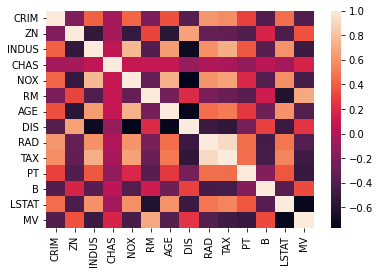

In [12]:
sns.heatmap(correlation)

In [13]:
# Statsmodels.OLS requires us to add a constant.
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     MV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        22:36:41   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [14]:
X=X[['RM','LSTAT','PT','TAX']]

In [15]:
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     MV   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              2518.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        22:36:41   Log-Likelihood:                         -1562.0
No. Observations:                 506   AIC:                                      3132.
Df Residuals:                     502   BIC:                                      3149.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)


In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [69]:
from sklearn import linear_model
reg_model=linear_model.LinearRegression()

In [70]:
reg_model.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred=reg_model.predict(X_test)
print('Coefficients:',reg_model.coef_, 'R2 Score:',reg_model.score(X, Y))

Coefficients: [-8.99378158e-02  4.06713067e-02  3.48920906e-02  2.70980219e+00
 -1.57743253e+01  4.60431501e+00 -1.39683569e-02 -1.36999129e+00
  2.42966161e-01 -1.28385643e-02 -8.74922600e-01  5.25474417e-03
 -4.52805611e-01] R2 Score: 0.735357549377645


In [21]:
result=pd.DataFrame()
result['Y_test']=y_test
result['Predicted Result']=y_pred

In [22]:
result

,Y_test,Predicted Result
162,50.000000,38.626088
163,50.000000,40.541468
399,6.300000,8.838952
247,20.500000,23.242057
66,19.400000,24.038977
...,...,...
220,26.700001,28.537614
326,23.000000,25.393431
359,22.600000,18.903418
128,18.000000,19.008119


In [72]:
from sklearn.metrics import r2_score
print("Proportion of variance: %.2f" % r2_score(y_test, y_pred))

Proportion of variance: 0.69


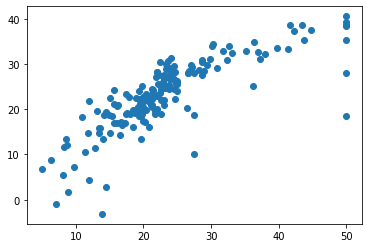

In [24]:
import matplotlib.pyplot as plt
#plt.scatter(X_train[:,1], y_train, color="black")
plt.scatter(y_test,y_pred)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


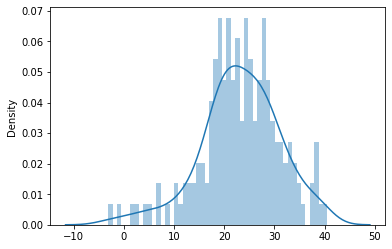

In [25]:
import seaborn as sns
sns.distplot((y_pred),bins=50);

Logistic Regression:
Apply logistic regression on the Loan dataset with "Decision" as the dependent variable. Do the necessary one-hot encoding for the categorical variables and discard the irrelevant variables. Use whatever libraries are appropriate when coding in Python.

In [26]:
import pandas as pd
import numpy as np


In [28]:
loan_data=pd.read_excel('/content/loan.xlsx')

In [29]:
print(loan_data.shape)
loan_data

(429, 14)


,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200,reject
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,reject
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200,accept
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300,accept


In [30]:
loan_data.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [73]:
loan_data.head(5)
loan_data.shape

(429, 14)

In [47]:
X=loan_data.iloc[:,:-1].values
X

array([['M', 50.75, 0.584999978542328, ..., 'given', 145, 0],
       ['M', 19.6700000762939, 10.0, ..., 'given', 140, 0],
       ['F', 52.8300018310547, 15.0, ..., 'given', 0, 2200],
       ...,
       ['M', 23.3299999237061, 1.5, ..., 'given', 422, 200],
       ['M', 21.0, 4.78999996185303, ..., 'given', 80, 300],
       ['M', 27.75, 1.28999996185303, ..., 'oth_inst_', 140, 0]],
      dtype=object)

In [48]:
y=loan_data.iloc[:,-1].values

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,3,4,5,6,9,10])],remainder='passthrough')
x=np.array(ct.fit_transform(X))

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [53]:
print(x)
print(x.shape)

[[0.0 1.0 1.0 ... 0 145 0]
 [0.0 1.0 0.0 ... 0 140 0]
 [1.0 0.0 1.0 ... 14 0 2200]
 ...
 [0.0 1.0 1.0 ... 0 422 200]
 [0.0 1.0 0.0 ... 1 80 300]
 [0.0 1.0 1.0 ... 0 140 0]]
(429, 35)


In [54]:
print(y.shape)

(429,)


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [56]:
print(X_train)
print(y_train.shape)
print(X_test)
print(y_test.shape)

[[0.0 1.0 1.0 ... 6 70 0]
 [1.0 0.0 1.0 ... 7 0 0]
 [1.0 0.0 1.0 ... 1 220 19]
 ...
 [0.0 1.0 1.0 ... 1 96 19]
 [0.0 1.0 1.0 ... 0 360 0]
 [1.0 0.0 1.0 ... 1 108 98]]
(343,)
[[0.0 1.0 1.0 ... 0 221 0]
 [0.0 1.0 1.0 ... 12 0 221]
 [0.0 1.0 1.0 ... 1 420 283]
 ...
 [1.0 0.0 0.0 ... 0 280 0]
 [1.0 0.0 1.0 ... 3 0 0]
 [1.0 0.0 1.0 ... 0 280 0]]
(86,)


In [57]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [58]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [59]:
prediction= logmodel.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.53      0.68        45
           1       0.65      0.95      0.77        41

    accuracy                           0.73        86
   macro avg       0.79      0.74      0.72        86
weighted avg       0.79      0.73      0.72        86



In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,prediction)
print(cm)
accuracy_score(y_test,prediction)

[[24 21]
 [ 2 39]]


0.7325581395348837